In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("dmu-work/test.csv")

In [3]:
print(df.isnull().sum())

version      0
file         0
has_smell    0
dtype: int64


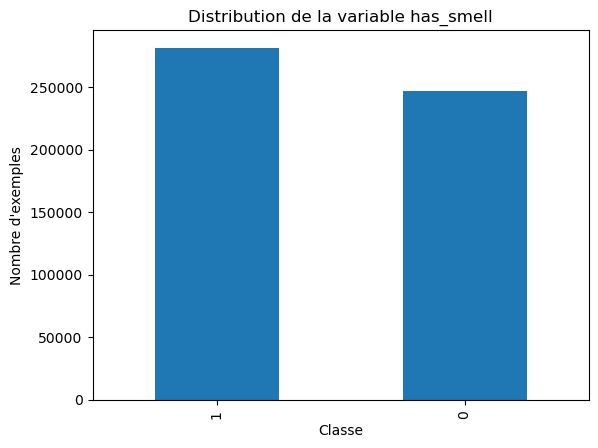

In [4]:
df["has_smell"].value_counts().plot(kind="bar")
plt.title("Distribution de la variable has_smell")
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")
plt.show()

In [5]:
categorical_features = ["version", "file"]
target_feature = "has_smell"

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_encoder, categorical_features)
    ],
    remainder='drop'
)

X = preprocessor.fit_transform(df[categorical_features])
y = df[target_feature].values

In [6]:
split_idx = int(0.8 * len(df))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [7]:
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test
"""

In [8]:
ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann_model.add(tf.keras.layers.Dropout(0.3))
ann_model.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann_model.add(tf.keras.layers.Dropout(0.3))
ann_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [9]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
ann_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[callback])

Epoch 1/100
10567/10567 [==============================] - 48s 4ms/step - loss: 0.0824 - accuracy: 0.9642 - val_loss: 0.9349 - val_accuracy: 0.8466
Epoch 2/100
10567/10567 [==============================] - 37s 3ms/step - loss: 0.0251 - accuracy: 0.9899 - val_loss: 1.4977 - val_accuracy: 0.8492
Epoch 3/100
10567/10567 [==============================] - 37s 4ms/step - loss: 0.0145 - accuracy: 0.9943 - val_loss: 2.3248 - val_accuracy: 0.8426
Epoch 4/100
10567/10567 [==============================] - 37s 3ms/step - loss: 0.0104 - accuracy: 0.9960 - val_loss: 2.4017 - val_accuracy: 0.8533
Epoch 5/100
10567/10567 [==============================] - 36s 3ms/step - loss: 0.0082 - accuracy: 0.9969 - val_loss: 3.2219 - val_accuracy: 0.8527
Epoch 6/100
10567/10567 [==============================] - 38s 4ms/step - loss: 0.0063 - accuracy: 0.9976 - val_loss: 3.3876 - val_accuracy: 0.8542
Epoch 7/100
10567/10567 [==============================] - 37s 4ms/step - loss: 0.0057 - accuracy: 0.9979 - val_

In [11]:
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype(int).flatten()
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ann))
print("Classification Report:\n", classification_report(y_test, y_pred_ann))

3303/3303 [==============================] - 6s 2ms/step
Accuracy: 0.7984839451494762
Confusion Matrix:
 [[36005   582]
 [20712 48370]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.98      0.77     36587
           1       0.99      0.70      0.82     69082

    accuracy                           0.80    105669
   macro avg       0.81      0.84      0.80    105669
weighted avg       0.87      0.80      0.80    105669

